**Recycling robot example** (from Sutton, page 42)
References:
  - Gym documentation: https://gym.openai.com/

  

In [252]:
import numpy as np
from gym.envs.toy_text import discrete
import random
import matplotlib.pyplot as plt

##### TODO: Describir coloquialmente el modelo de sutton
Dos estados: high y low
Tres acciones: search, wait, recharge

##### TODO: Explicar lo básico de GYM

# Considere el modelo del robot de reciclaje descríto en Sutton Example 3.2

<img src="img/example3.2-1.png" width="500" align="left">

<img src="img/example3.2-2.png" width="500" align="left">

In [253]:
states = ["high", "low"]
actions = ["wait", "search", "recharge"]

P = {}

P[0] = {}
P[1] = {}

alpha = 0.8
beta = 0.1
r_wait = 0.5
r_search = 2.0

# definimos un ambiente discreto con las transiciones según el gráfico
def generar_ambiente(alpha=alpha, beta=beta, r_wait=r_wait, r_search=r_search):
    P[0][0] = [(1.0, 0, r_wait, False)]
    P[0][1] = [(alpha, 0, r_search, False),
               (1-alpha, 1, r_search, False)]
    P[0][2] = [(1,0,0,False)]

    P[1][0] = [(1.0, 1, r_wait, False)]
    P[1][1] = [(beta, 1, r_search, False), 
               (1-beta, 0, -3.0, False)]
    P[1][2] = [(1.0, 0, 0.0, False)]
    env = discrete.DiscreteEnv(2, 3, P, [0.0, 1.0])
    return(env)
env = generar_ambiente()

# Implemente la estrategia random para veinte episodios. 


Definir una acción aleatoria y ver que reward produce

In [254]:
env = generar_ambiente()
print("Obs\tDone\tReward\tC.Reward\tAction")
verbose=True
history = []
rewardAcum = 0
state=1 # < starting state
for i in range(50):
    #action = env.action_space.sample()
    if state == 1:
        action = np.random.choice([0,1,2])
    else:
        action = np.random.choice([0,1])
    #print(action)
    state, reward, done, info = env.step(action)
    if done:
        observation = env.reset()
    rewardAcum += reward
    elemHist = np.array([i, reward, rewardAcum])
    history.append(elemHist)
    if verbose:
        print(state,"\t", done,"\t", reward, "\t", "%.3f" % rewardAcum, "\t\t", action)
    env.close()

Obs	Done	Reward	C.Reward	Action
1 	 False 	 0.5 	 0.500 		 0
1 	 False 	 0.5 	 1.000 		 0
1 	 False 	 0.5 	 1.500 		 0
0 	 False 	 0.0 	 1.500 		 2
0 	 False 	 0.5 	 2.000 		 0
0 	 False 	 0.5 	 2.500 		 0
0 	 False 	 0.5 	 3.000 		 0
0 	 False 	 2.0 	 5.000 		 1
0 	 False 	 0.5 	 5.500 		 0
0 	 False 	 2.0 	 7.500 		 1
0 	 False 	 0.5 	 8.000 		 0
0 	 False 	 2.0 	 10.000 		 1
0 	 False 	 2.0 	 12.000 		 1
0 	 False 	 2.0 	 14.000 		 1
0 	 False 	 2.0 	 16.000 		 1
0 	 False 	 0.5 	 16.500 		 0
0 	 False 	 2.0 	 18.500 		 1
0 	 False 	 0.5 	 19.000 		 0
0 	 False 	 0.5 	 19.500 		 0
0 	 False 	 2.0 	 21.500 		 1
0 	 False 	 0.5 	 22.000 		 0
0 	 False 	 0.5 	 22.500 		 0
0 	 False 	 0.5 	 23.000 		 0
0 	 False 	 2.0 	 25.000 		 1
0 	 False 	 0.5 	 25.500 		 0
0 	 False 	 2.0 	 27.500 		 1
0 	 False 	 0.5 	 28.000 		 0
0 	 False 	 0.5 	 28.500 		 0
0 	 False 	 2.0 	 30.500 		 1
0 	 False 	 2.0 	 32.500 		 1
0 	 False 	 0.5 	 33.000 		 0
0 	 False 	 2.0 	 35.000 		 1
0 	 False 	 0.5 	 3

# Grafique la recompensa acumulada

In [255]:
# to numpy
history = np.array(history)
history[0:6]

array([[0. , 0.5, 0.5],
       [1. , 0.5, 1. ],
       [2. , 0.5, 1.5],
       [3. , 0. , 1.5],
       [4. , 0.5, 2. ],
       [5. , 0.5, 2.5]])

In [256]:
# so I can do this
history[0:6, 1]

array([0.5, 0.5, 0.5, 0. , 0.5, 0.5])

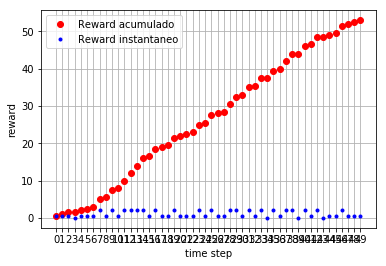

In [257]:
plt.grid()
plt.xlabel("time step")
plt.ylabel("reward")
plt.xticks(np.arange(0,len(history),1))
plt.plot(history[:,0], history[:,2], 'ro', label='Reward acumulado')
plt.plot(history[:,0], history[:,1], 'b.', label='Reward instantaneo')

plt.legend()

# Calcule de forma teórica V, la value function optima para cada estado

<span style="color:red">**PREGUNTAR v !!!**</span>

    #x: actual state
    #y's: next states

    V(x) = reward + gamma (sum_y( p(y|a,x) * V(y) ))

$V^*(x) = R + \gamma * \sum_{y \in S'}\ p(y\ |\ a,x) * V(y)$

# Implemente el algoritmo de iteración de valor (Value iteration)

<img src="img/value-iteration-4.4.png" width="500" align="left">

  Evaluate the optimal value function given a full description of the environment dynamics
  
  

```
 Args:

        env: OpenAI env. env.P represents the transition probabilities of the environment.
            env.P[s][a] is a list of transition tuples (prob, next_state, reward, done).
            env.nS is a number of states in the environment. 
            env.nA is a number of actions in the environment.
        theta: We stop evaluation once our value function change is less than theta for all states.
        discount_factor: Gamma discount factor.
  
  Returns:
        Vector of length env.nS representing the value function.
```


  
   

In [258]:
for s in range(env.nS):
    for a in range(env.nA):
        print("state:",s, ", action:",a, " -> " ,env.P[s][a])

state: 0 , action: 0  ->  [(1.0, 0, 0.5, False)]
state: 0 , action: 1  ->  [(0.8, 0, 2.0, False), (0.19999999999999996, 1, 2.0, False)]
state: 0 , action: 2  ->  [(1, 0, 0, False)]
state: 1 , action: 0  ->  [(1.0, 1, 0.5, False)]
state: 1 , action: 1  ->  [(0.1, 1, 2.0, False), (0.9, 0, -3.0, False)]
state: 1 , action: 2  ->  [(1.0, 0, 0.0, False)]


In [259]:
# en cada estado, quiero calcular la value function optima;
# uso ecuacion de bellman, tomando el reward instantaneo y
# estimando futuros posibles rewards a partir de las acciones.
def valueIteration(env, theta=0.1, gamma=0.9, verbose=False):
    if verbose:
        print("epoch\tvalue V^pi_i")
    update=float('inf')
    #V = np.zeros((env.nS, env.nA))
    V = np.zeros(env.nS)
    policyPi = np.zeros((env.nS, env.nA))
    epoch=0
    while(update > theta):
        # bellman eq, for each state
        for s in range(env.nS):
            vPrev = V[s]
            maxReward = -float('inf')
            for a in range(env.nA):
                sumFutureRewards = 0
                for prob, next_state, reward, done in env.P[s][a]:
                    #sum rewards over all possible next states
                    sumFutureRewards += prob * (reward + gamma*V[next_state])

                # me quedo con el mayor reward entre todas las actions a posibles en
                # el estado s
                if(maxReward < sumFutureRewards):
                    maxReward = sumFutureRewards
                    maxAction = a

            # me comporto greedy al elegir el valor maximo entre los obtenidos 
            V[s] = maxReward
            policyPi[s][maxAction] = 1
            update = abs(V[s] - vPrev)
            #print(update)
        epoch += 1
        if verbose:
            print(epoch, ":", V)
    print("Value Function after", epoch, "epochs:",V)
    return policyPi

In [260]:
valueIteration(env)

Value Function after 25 epochs: [16.21487099 14.59338389]


array([[0., 1., 0.],
       [0., 0., 1.]])

# Implemente el algoritmo de policy iteration

Definir primero una funcion de evaluación de politica,

```
Evaluate a policy given an environment and a full description of the environment's dynamics.
    
    Args:
        policy: [S, A] shaped matrix representing the policy.
        env: OpenAI env. env.P represents the transition probabilities of the environment.
            env.P[s][a] is a list of transition tuples (prob, next_state, reward, done).
            env.nS is a number of states in the environment. 
            env.nA is a number of actions in the environment.
        theta: We stop evaluation once our value function change is less than theta for all states.
        discount_factor: Gamma discount factor.
    
    Returns:
        Vector of length env.nS representing the value function.
        
```

Despues una funcion de optimisacion de la politica:


```
 Policy Improvement Algorithm. Iteratively evaluates and improves a policy
    until an optimal policy is found.
    
    Args:
        env: The OpenAI envrionment.
        policy_eval_fn: Policy Evaluation function that takes 3 arguments:
            policy, env, discount_factor.
        discount_factor: gamma discount factor.
        
    Returns:
        A tuple (policy, V). 
        policy is the optimal policy, a matrix of shape [S, A] where each state s
        contains a valid probability distribution over actions.
        V is the value function for the optimal policy.
        
```





<img src="img/policy-evaluation-4.1.png" width="500" align="left">

<img src="img/value-vs-policy.png" width="500" align="left">

In [261]:
# Policy Evaluation 
# copypasteo la de value iteration:
# en cada estado, quiero calcular la value function PARA UNA POLICY PI;
# uso ecuacion de bellman, tomando el reward instantaneo y
# estimando futuros posibles rewards a partir de las acciones, que son elegidas
# a partir de la policy pi.
def policyEvaluation(env, policy, theta=0.1, gamma=0.9, verbose=False):
    if verbose:
        print("epoch\tvalue V^pi_i")
    update=float('inf')
    
    #V = np.zeros((env.nS, env.nA))

    V = np.zeros(env.nS)
    epoch=0
    while(update > theta):
        # bellman eq, for each state
        for s in range(env.nS):
            vPrev = V[s]
            piReward = -float('inf')
            #for a in policy[s,:]:
            #sumFutureRewards = 0
            piReward=0
            a = np.random.choice([0,1,2], p=policy[s])
            for prob, next_state, reward, done in env.P[s][a]:
                # cada una de las acciones que realiza la policy en el estado s
                # sums rewards ONLY OVER policy's actions
                #sumFutureRewards += prob * (reward + gamma*V[next_state])
                piReward += prob * (reward + gamma*V[next_state])
                # me quedo con el mayor reward entre todas las actions a posibles en
                # el estado s
                #maxReward = max(maxReward, sumFutureRewards)
                #piReward += sumFutureRewards
            # me comporto greedy al elegir el valor maximo entre los obtenidos 
            V[s] = piReward
            update = abs(V[s] - vPrev)
            #print(update)
        epoch += 1
        if verbose:
            print(epoch, ":", V)
    print("Value Function of policy Pi after", epoch, "epochs:",V)
    return V

In [262]:
policy=np.zeros((env.nS, env.nA))#[S,A]
#le doy dos valores para que la suma ed las probas ed 1 y no
# explote el random.choice([], p=[probas])
policy[0][1] = 1
policy[1][0] = 1
policyEvaluation(env, policy, verbose=True)

epoch	value V^pi_i
1 : [2.  0.5]
2 : [3.53 0.95]
3 : [4.7126 1.355 ]
4 : [5.636972 1.7195  ]
5 : [6.36812984 2.04755   ]
6 : [6.95361248 2.342795  ]
7 : [7.42830409 2.6085155 ]
8 : [7.81791173 2.84766395]
9 : [8.14147596 3.06289756]
10 : [8.41318425 3.2566078 ]
11 : [8.64368206 3.43094702]
12 : [8.84102155 3.58785232]
13 : [9.01134893 3.72906709]
14 : [9.15940331 3.85616038]
15 : [9.28887925 3.97054434]
16 : [9.40269104 4.07348991]
17 : [9.50316573 4.16614092]
Value Function of policy Pi after 17 epochs: [9.50316573 4.16614092]


array([9.50316573, 4.16614092])

<img src="img/policy-iteration-4.3.png" width="500" align="left">

<img src="img/value-iteration-4.4.png" width="500" align="left">

In [263]:
policyPi

array([[0., 1., 0.],
       [0., 0., 1.]])

In [271]:
#temporal!!
def valueSearch(env, theta=0.1, gamma=0.9, verbose=False):
    if verbose:
        print("epoch\tvalue V^pi_i")
    update=float('inf')
    #V = np.zeros((env.nS, env.nA))
    V = np.zeros(env.nS)
    policyPi = np.zeros((env.nS, env.nA))
    epoch=0
    while(update > theta):
        # bellman eq, for each state
        for s in range(env.nS):
            vPrev = V[s]
            maxReward = -float('inf')
            for a in range(env.nA):
                sumFutureRewards = 0
                for prob, next_state, reward, done in env.P[s][a]:
                    #sum rewards over all possible next states
                    sumFutureRewards += prob * (reward + gamma*V[next_state])

                # me quedo con el mayor reward entre todas las actions a posibles en
                # el estado s
                if(maxReward < sumFutureRewards):
                    maxReward = sumFutureRewards
                    maxAction = a

            # me comporto greedy al elegir el valor maximo entre los obtenidos 
            V[s] = maxReward
            policyPi[s][maxAction] = 1
            update = abs(V[s] - vPrev)
            #print(update)
        epoch += 1
        if verbose:
            print(epoch, ":", V)
    print("Value Function after", epoch, "epochs:",V)
    return policyPi

In [282]:
def policyImprovement(env, policy, gamma=0.9):
    print(policy)
    policyStable = False
    V = policyEvaluation(env, policy, gamma=0.9, verbose=False)
    while(not policyStable):
        policyStable = True
        for s in range(env.nS):
            print("For state s:", s)
            #oldA = np.random.choice(policy[s], policy[s])
            oldA = np.array(policy[s])
            
            # action siguiendo policy Pi en state s
            #if state == 1:
            #    a = np.random.choice([0,1,2], p=policy[s])
            #else:
            #    a = np.random.choice([0,1,2], p=policy[s])
            
            #print(maxReward, sumFutureRewards)
            maxReward = -float('inf')
            maxAction = 0;
            for a in range(env.nA):
                sumFutureRewards = 0
                for prob, next_state, reward, done in env.P[s][a]:
                    #sum rewards over all possible next states
                    sumFutureRewards += prob * (reward + gamma*V[next_state])
                #print(maxReward, sumFutureRewards)

                # me quedo con el mayor reward entre todas las actions a posibles en
                # el estado s
                if(maxReward < sumFutureRewards):
                    maxReward = sumFutureRewards
                    maxAction = a
            #policyPi = valueIteration(env, gamma=0.9, verbose=False)
            oneHot = np.zeros(3)
            oneHot[maxAction] = 1
            policy[s] = oneHot
            #if oldA != policy[s]:
            #print(oldA, policy[s])
            if not np.array_equal(oldA, policy[s]):
                print("policyStable to:", policyStable)
                policyStable = False
        if policyStable:
            return (policy, V)
        else:
            print(policy)
            V = policyEvaluation(env, policy, gamma=0.9, verbose=False)
            #como lo comparo? que mido?


In [ ]:
# el algoritmo corta antes cuando llega algo estable, eso puede ser que cause qe el valor no sea el optimo
# TODO
# usar una diferencia ed la misma forma que con la value iteration
# los valores deberian ser los mismos

In [283]:
policyRand=np.zeros((env.nS, env.nA))#[S,A]
#le doy dos valores para que la suma ed las probas ed 1 y no
# explote el random.choice([], p=[probas])
policyRand[0][0] = 1
policyRand[1][0] = 1
print(policyRand)
print(policyImprovement(env, policy=policyRand))

[[1. 0. 0.]
 [1. 0. 0.]]
[[1. 0. 0.]
 [1. 0. 0.]]
Value Function of policy Pi after 17 epochs: [4.16614092 4.16614092]
For state s: 0
policyStable to: True
For state s: 1
[[0. 1. 0.]
 [1. 0. 0.]]
Value Function of policy Pi after 17 epochs: [6.72452818 4.16614092]
For state s: 0
For state s: 1
policyStable to: True
[[0. 1. 0.]
 [0. 0. 1.]]
Value Function of policy Pi after 21 epochs: [8.36147152 7.52532436]
For state s: 0
For state s: 1
(array([[0., 1., 0.],
       [0., 0., 1.]]), array([8.36147152, 7.52532436]))


In [267]:
V

array([6.72452818, 4.16614092])

# Utilizando los 3 algoritmos, realice los experimentos para las siguientes configuraciones del ambiente.

In [284]:
exp1 = generar_ambiente(alpha=0.9, beta=0.9, r_search=3, r_wait=2)
exp2 = generar_ambiente(alpha=0.8, beta=0.5, r_search=3, r_wait=2)
exp3 = generar_ambiente(alpha=0.5, beta=0.5, r_search=3, r_wait=2)
exp4 = generar_ambiente(alpha=0.9, beta=0.6, r_search=1, r_wait=0.9)
exp5 = generar_ambiente(alpha=0.9, beta=0.6, r_search=1, r_wait=0.5)


# Utilizando el grafico de recompensa, compare las estrategias óptimas generadas con los experimentos anteriores contra la estrategia al azar.